In [923]:
import hiive.mdptoolbox, hiive.mdptoolbox.example, hiive.mdptoolbox.mdp
import hiive.mdptoolbox as mdptoolbox

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import gym
import numpy as np

## MDP Definition

- is the expected value of all possible future rewards, on all possible actions.

In [962]:
class MarkovDecisionProcess(object):
    
    def __init__(self, problem_name, discount_factor=0.9, alpha=0.5, epsilon=0.9, epsilon_decay=0.1):
        self.problem_name = problem_name 
        self.discount_factor = discount_factor
        self.alpha = alpha
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        
    def setup_env(self):
        self.env = gym.make(self.problem_name)
        self.num_actions = self.env.nA
        self.num_states = self.env.nS
        self.rewards = np.zeros([self.num_actions, self.num_states, self.num_states])
        self.transitions = np.zeros([self.num_actions, self.num_states, self.num_states])
        self.generate_matrices()
        
    def generate_matrices(self):
        for s in range(self.num_states):
            for a in range(self.num_actions):
                inner = self.env.P[s][a]
                for t in inner:
                    transition_prob, next_state, reward, done = t
                    self.transitions[a][s][next_state] += transition_prob
                    self.rewards[a][s][next_state] = reward
                
    def policy_iteration(self):
        pi = mdptoolbox.mdp.PolicyIteration(self.transitions, self.rewards, self.discount_factor)
        pi.setVerbose()
        self.output = pi.run()
        self.policy = pi.policy
        
    def value_iteration(self):
        vi = mdptoolbox.mdp.ValueIteration(self.transitions, self.rewards, self.discount_factor)
        vi.setVerbose()
        self.output = vi.run() 
        self.policy = vi.policy
        
    def q_learning(self):
        ql = mdptoolbox.mdp.QLearning(self.transitions, self.rewards, self.discount_factor, alpha=self.alpha, epsilon=self.epsilon, epsilon_decay=self.epsilon_decay, run_stat_frequency=1, n_iter=10000)
        ql.setVerbose()
        self.output = ql.run()
        self.policy = ql.policy
        self.Q = ql.Q
    
    def run(self, rl_algo):
        self.setup_env()
        if rl_algo == "policy_iteration":
            self.policy_iteration()
        elif rl_algo == "value_iteration":
            self.value_iteration()
        elif rl_algo == "q_learning":
            self.q_learning()
        else:
            print("Unsupported reinforcement learning algorithm.")

In [925]:
# max_iterations = 80
# gamma = 1  # discount factor
# alpha = 0.9  # learning rate
# eps = 0.99  # exploitation rate

### Policy Iteration
- reward
- error
- time
- max V
- mean V

In [926]:
start = time.time()
print("hello")
mdp_pol = MarkovDecisionProcess("FrozenLake-v0")
mdp_pol.run("policy_iteration")
end = time.time()
print(end - start)

mdp_pol.output

hello
 Iteration   Variation
         1           7
         2           5
         3           4
         4           2
         5           1
         6           0
Iterating stopped, unchanging policy found.
0.013365983963012695


[{'State': None,
  'Action': None,
  'Reward': 0.4761904761904762,
  'Error': 0.14285714285714285,
  'Time': 0.0005948543548583984,
  'Max V': 0.4761904761904762,
  'Mean V': 0.0452452461789103,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 0.5818649566344144,
  'Error': 0.04463500350626872,
  'Time': 0.0011200904846191406,
  'Max V': 0.5818649566344144,
  'Mean V': 0.0902144580841161,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 0.6344650610234918,
  'Error': 0.017306100255922316,
  'Time': 0.0026330947875976562,
  'Max V': 0.6344650610234918,
  'Mean V': 0.12311606746555231,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 0.6389650771933137,
  'Error': 0.002106991866823116,
  'Time': 0.004277944564819336,
  'Max V': 0.6389650771933137,
  'Mean V': 0.1352175510786241,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 0.6390201481186111,
  'Error': 6.938893903907228e-17,
  'Time': 0.005798816680908203,
  'Max V'

In [927]:
policy_df = pd.DataFrame(mdp_pol.output)

Text(0.5, 1.0, 'Frozen Lake - Policy Iteration: Reward v. Iteration')

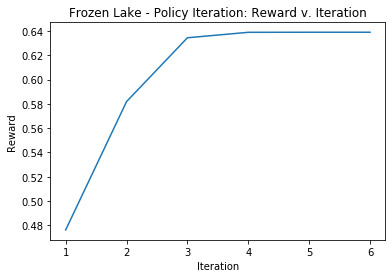

In [928]:
ax = sns.lineplot(x="Iteration", y="Reward", data=policy_df)
ax.set_title("Frozen Lake - Policy Iteration: Reward v. Iteration")

Text(0.5, 1.0, 'Frozen Lake - Policy Iteration: Mean V v. Iteration')

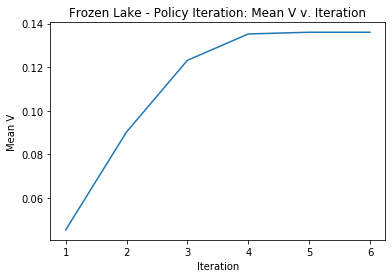

In [929]:
ax = sns.lineplot(x="Iteration", y="Mean V", data=policy_df)
ax.set_title("Frozen Lake - Policy Iteration: Mean V v. Iteration")

In [930]:
#ax = sns.lineplot(x="Iteration", y="Error", data=policy_df)

In [931]:
#ax = sns.barplot(x="Iteration", y="Time", data=policy_df)

### Value Iteration

In [932]:
start = time.time()
print("hello")
mdp_val = MarkovDecisionProcess("FrozenLake-v0")
mdp_val.run("policy_iteration")
end = time.time()
print(end - start)

mdp_val.output

hello
 Iteration   Variation
         1           7
         2           5
         3           4
         4           2
         5           1
         6           0
Iterating stopped, unchanging policy found.
0.013082265853881836


[{'State': None,
  'Action': None,
  'Reward': 0.4761904761904762,
  'Error': 0.14285714285714285,
  'Time': 0.0015680789947509766,
  'Max V': 0.4761904761904762,
  'Mean V': 0.0452452461789103,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 0.5818649566344144,
  'Error': 0.04463500350626872,
  'Time': 0.0028159618377685547,
  'Max V': 0.5818649566344144,
  'Mean V': 0.0902144580841161,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 0.6344650610234918,
  'Error': 0.017306100255922316,
  'Time': 0.004285097122192383,
  'Max V': 0.6344650610234918,
  'Mean V': 0.12311606746555231,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 0.6389650771933137,
  'Error': 0.002106991866823116,
  'Time': 0.005861043930053711,
  'Max V': 0.6389650771933137,
  'Mean V': 0.1352175510786241,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 0.6390201481186111,
  'Error': 6.938893903907228e-17,
  'Time': 0.006966114044189453,
  'Max V':

In [933]:
vals = {0: "left", 1: "down", 2: "right", 3: "up"}

output = [None] * 16

for idx, val in enumerate(mdp_val.policy):
    output[idx] = vals[val]

In [934]:
print(output)

['left', 'up', 'left', 'up', 'left', 'left', 'left', 'left', 'up', 'down', 'left', 'left', 'left', 'right', 'down', 'left']


In [979]:
hi = (0, 1, 0, 0, 2, 0, 2, 0, 3, 1, 0, 0, 0, 2, 1, 0)

vals = {0: "left", 1: "down", 2: "right", 3: "up"}

output = [None] * 16

for idx, val in enumerate(hi):
    output[idx] = vals[val]

In [981]:
print(output)

['left', 'down', 'left', 'left', 'right', 'left', 'right', 'left', 'up', 'down', 'left', 'left', 'left', 'right', 'down', 'left']


In [936]:
value_df = pd.DataFrame(mdp_val.output)

Text(0.5, 1.0, 'Frozen Lake - Value Iteration: Reward v. Iteration')

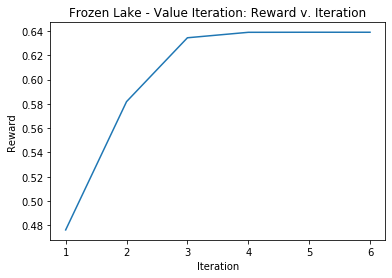

In [937]:
ax = sns.lineplot(x="Iteration", y="Reward", data=value_df)
ax.set_title("Frozen Lake - Value Iteration: Reward v. Iteration")

In [938]:
value_df
value_df['algorithm'] = 'value iteration'

In [939]:
policy_df
policy_df['algorithm'] = 'policy iteration'

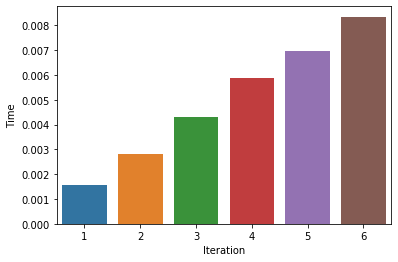

In [940]:
ax = sns.barplot(x="Iteration", y="Time", data=value_df)

In [941]:
comb = pd.concat([value_df, policy_df])

Text(0.5, 1.0, 'Frozen Lake: Reward vs. Iteration')

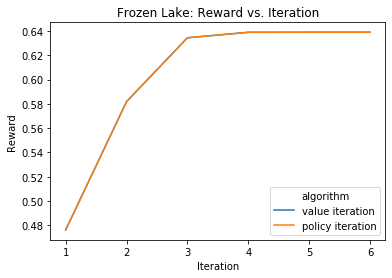

In [942]:
ax = sns.lineplot(x="Iteration", y="Reward", data=comb, hue="algorithm")
ax.set_title("Frozen Lake: Reward vs. Iteration")

Text(0.5, 1.0, 'Frozen Lake: Mean V vs. Iteration')

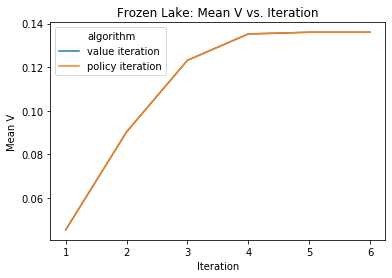

In [943]:
ax = sns.lineplot(x="Iteration", y="Mean V", data=comb, hue="algorithm")
ax.set_title("Frozen Lake: Mean V vs. Iteration")

Text(0.5, 1.0, 'Frozen Lake: Runtime vs. Iteration')

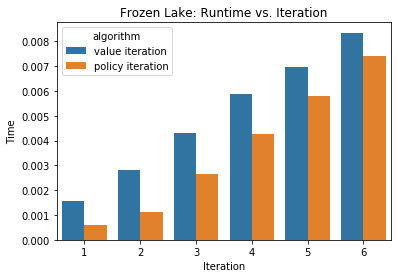

In [944]:
ax = sns.barplot(x="Iteration", y="Time", data=comb, hue="algorithm")
ax.set_title("Frozen Lake: Runtime vs. Iteration")

In [945]:
vi_output = pd.DataFrame()

for discount_factor in [0.6, 0.7, 0.8, 0.9, 1]:
    mdp_val = MarkovDecisionProcess("FrozenLake-v0", discount_factor)
    mdp_val.run("value_iteration") 
    df = pd.DataFrame(mdp_val.output)
    df['algorithm'] = "value_iteration"
    df['discount_factor'] = discount_factor
    vi_output = vi_output.append(df)

 Iteration   Variation
         1    0.333333
         2    0.066667
         3    0.026667
         4    0.016000
         5    0.006933
         6    0.003840
Iterating stopped, epsilon-optimal policy found.
 Iteration   Variation
         1    0.333333
         2    0.077778
         3    0.036296
         4    0.025407
         5    0.012845
         6    0.008300
         7    0.004573
         8    0.002874
Iterating stopped, epsilon-optimal policy found.
 Iteration   Variation
         1    0.333333
         2    0.088889
         3    0.047407
         4    0.037926
         5    0.021913
         6    0.016182
         7    0.010188
         8    0.007320
         9    0.004935
        10    0.003459
        11    0.002483
Iterating stopped, epsilon-optimal policy found.
 Iteration   Variation
         1    0.333333
         2    0.100000
         3    0.060000
         4    0.054000
         5    0.035100
         6    0.029160
         7    0.020655
         8    0.016694
  

In [946]:
ax = sns.lineplot(x="discount_factor", y="Reward", data=output)


AttributeError: 'list' object has no attribute 'get'

In [947]:
pi_output = pd.DataFrame()

for discount_factor in [0.6, 0.7, 0.8, 0.9]:
    mdp_val = MarkovDecisionProcess("FrozenLake-v0", discount_factor)
    mdp_val.run("policy_iteration") 
    df = pd.DataFrame(mdp_val.output)
    df['algorithm'] = "policy_iteration"
    df['discount_factor'] = discount_factor
    pi_output = pi_output.append(df)

 Iteration   Variation
         1           6
         2           5
         3           2
         4           0
Iterating stopped, unchanging policy found.
 Iteration   Variation
         1           6
         2           5
         3           2
         4           0
Iterating stopped, unchanging policy found.
 Iteration   Variation
         1           6
         2           6
         3           2
         4           1
         5           0
Iterating stopped, unchanging policy found.
 Iteration   Variation
         1           7
         2           5
         3           4
         4           2
         5           1
         6           0
Iterating stopped, unchanging policy found.


In [948]:
df_output = pd.concat([vi_output, pi_output, ql_output])

Text(0.5, 1.0, 'Frozen Lake: Reward vs. Discount Factor')

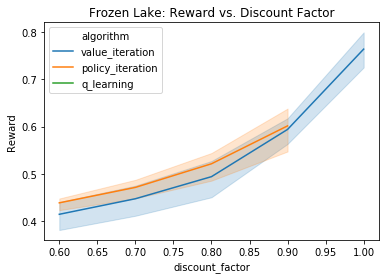

In [949]:
ax = sns.lineplot(x="discount_factor", y="Reward", hue="algorithm", data=df_output)
ax.set_title("Frozen Lake: Reward vs. Discount Factor")

### Q Learning

In [952]:
ideal = mdp_val.policy

In [978]:
start = time.time()
print("hello")

# Plot the Q-values as a heatmap
mdp_ql = MarkovDecisionProcess("FrozenLake-v0", alpha=0.1)
mdp_ql.run("q_learning")

mdp_ql.output

end = time.time()
print(end - start)

hello
0.762645959854126


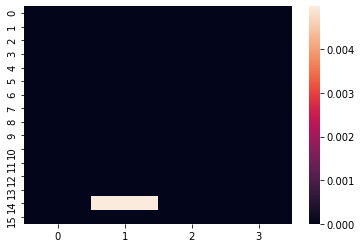

In [869]:
sns.heatmap(mdp_ql.Q)

In [ ]:
# discount: 0.1, alpha: 0.7, epsilon: 0.97, epsilon_decay: 0.02
# (0, 1, 0, 0, 2, 0, 2, 0, 3, 1, 0, 0, 0, 2, 1, 0)

In [972]:
ideal

(0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0)

In [976]:
ql_output = pd.DataFrame()

matrix = {'discount': [0.05, 0.1, 0.15], 'alpha': [0.65, 0.7, 0.75], 'epsilon': [0.96, 0.97, 0.98, 0.99], 'epsilon_decay': [0.01, 0.02]}

for d in matrix['discount']:
    for a in matrix['alpha']:
        for e in matrix['epsilon']:
            for ed in matrix['epsilon_decay']:
                mdp_ql = MarkovDecisionProcess("FrozenLake-v0", discount_factor=d, alpha=a, epsilon=e, epsilon_decay=ed)
                mdp_ql.run("q_learning")
                print("discount: {}, alpha: {}, epsilon: {}, epsilon_decay: {}".format(d, a, e, ed))
                print(mdp_ql.policy)
                df = pd.DataFrame(mdp_ql.output)
                df['algorithm'] = "q_learning"
                df['learning_rate'] = alpha
                ql_output = ql_output.append(df)


discount: 0.05, alpha: 0.65, epsilon: 0.96, epsilon_decay: 0.01
(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 3, 0)
discount: 0.05, alpha: 0.65, epsilon: 0.96, epsilon_decay: 0.02
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0)
discount: 0.05, alpha: 0.65, epsilon: 0.97, epsilon_decay: 0.01
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
discount: 0.05, alpha: 0.65, epsilon: 0.97, epsilon_decay: 0.02
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
discount: 0.05, alpha: 0.65, epsilon: 0.98, epsilon_decay: 0.01
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
discount: 0.05, alpha: 0.65, epsilon: 0.98, epsilon_decay: 0.02
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
discount: 0.05, alpha: 0.65, epsilon: 0.99, epsilon_decay: 0.01
(0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0)
discount: 0.05, alpha: 0.65, epsilon: 0.99, epsilon_decay: 0.02
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
discount: 0.05, alpha: 0.7, epsilon: 0.96, epsilon_decay: 0.01
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [915]:
# learning_rate = 0.1
# discount_rate = 0.99

# exploration_rate = 1
# max_exploration_rate = 1
# min_exploration_rate = 0.01
# exploration_decay_rate = 0.01

mdp_ql = MarkovDecisionProcess("FrozenLake-v0", discount_factor=0.99, alpha=0.1, epsilon=1)
mdp_ql.run("q_learning")

In [916]:
test = pd.DataFrame(mdp_ql.output)

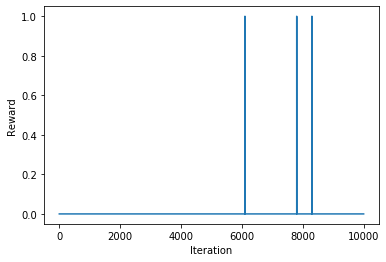

In [920]:
ax = sns.lineplot(x="Iteration", y="Reward", data=test)

In [921]:
mdp_ql.policy

(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0)

Text(0.5, 1.0, 'Frozen Lake - Policy Iteration: Reward v. Iteration')

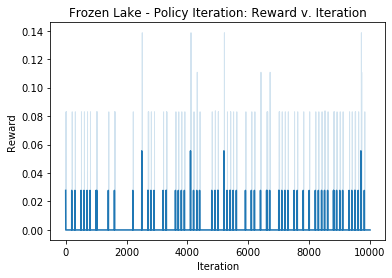

In [907]:
ax = sns.lineplot(x="Iteration", y="Reward", data=ql_output)
ax.set_title("Frozen Lake - Policy Iteration: Reward v. Iteration")

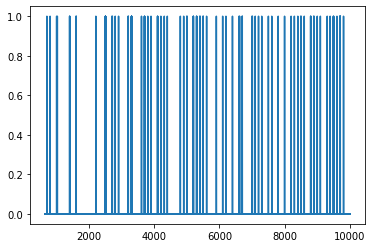

In [914]:
ql_output[(ql_output.Alpha == 0.001000 )& (ql_output.Epsilon == 0.10000)].Reward.plot()

In [894]:
ql_output[ql]

,State,Action,Reward,Error,Time,Alpha,Epsilon,Gamma,Max V,Mean V,Iteration,algorithm,learning_rate
0,1,3,0.0,0.0,0.000121,0.700000,0.970000,0.8,0.0,0.0,1,q_learning,0.8
1,1,0,0.0,0.0,0.000249,0.693000,0.960300,0.8,0.0,0.0,2,q_learning,0.8
2,0,2,0.0,0.0,0.000362,0.686070,0.950697,0.8,0.0,0.0,3,q_learning,0.8
3,1,0,0.0,0.0,0.000469,0.679209,0.941190,0.8,0.0,0.0,4,q_learning,0.8
4,5,0,0.0,0.0,0.000564,0.672417,0.931778,0.8,0.0,0.0,5,q_learning,0.8


In [893]:
ql_output[ql_output.Reward == 1].Epsilon.value_counts()

0.10000    86
0.94119     1
0.13398     1
0.97000     1
Name: Epsilon, dtype: int64

In [895]:
ql_output[ql_output.Reward == 1].Alpha.value_counts()

0.001000    83
0.001924     1
0.800000     1
0.108266     1
0.038452     1
0.679209     1
0.005100     1
Name: Alpha, dtype: int64

In [896]:
ql_output[ql_output.Reward == 1].Gamma.value_counts()

1.0    39
0.9    31
0.8    19
Name: Gamma, dtype: int64

In [385]:
ql_output = pd.DataFrame()

for x in range(10):
    for alpha in [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
        mdp_ql = MarkovDecisionProcess("FrozenLake-v0", alpha=alpha)
        mdp_ql.run("q_learning")
        df = pd.DataFrame(mdp_ql.output)
        df['algorithm'] = "q_learning"
        df['learning_rate'] = alpha
        ql_output = ql_output.append(df)

In [823]:
mdp_ql.policy

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0)

In [386]:
ql_df = pd.DataFrame(mdp_ql.output)

In [387]:
#                  alpha=0.1, alpha_decay=0.99, alpha_min=0.001,
#                  epsilon=1.0, epsilon_min=0.1, epsilon_decay=0.99,
#                  n_iter=10000, skip_check=False, iter_callback=None,
#                  run_stat_frequency=None):

Text(0.5, 1.0, 'Frozen Lake: Reward vs. Learning Rate')

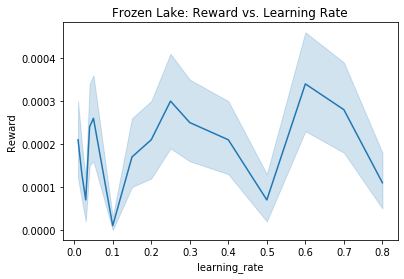

In [388]:
ax = sns.lineplot(x="learning_rate", y="Reward", data=ql_output)
ax.set_title("Frozen Lake: Reward vs. Learning Rate")

In [221]:
# https://towardsdatascience.com/practical-reinforcement-learning-02-getting-started-with-q-learning-582f63e4acd9
# gamma - Discount factor 
# alpha - Learning rate 
ql_df.sort_values('Reward').describe()

,State,Action,Reward,Error,Time,Alpha,Epsilon,Gamma,Max V,Mean V,Iteration
count,10000.000000,10000.000000,10000.0,10000.0,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.00000
mean,9.123100,0.161100,0.0,0.0,0.373004,0.001944,0.106709,0.5,0.0,0.0,5000.50000
std,3.625501,0.597313,0.0,0.0,0.197740,0.006887,0.057960,0.0,0.0,0.0,2886.89568
min,0.000000,0.000000,0.0,0.0,0.000143,0.001000,0.100000,0.5,0.0,0.0,1.00000
25%,5.000000,0.000000,0.0,0.0,0.209511,0.001000,0.100000,0.5,0.0,0.0,2500.75000
50%,11.000000,0.000000,0.0,0.0,0.377481,0.001000,0.100000,0.5,0.0,0.0,5000.50000
75%,12.000000,0.000000,0.0,0.0,0.542160,0.001000,0.100000,0.5,0.0,0.0,7500.25000
max,15.000000,3.000000,0.0,0.0,0.710341,0.100000,1.000000,0.5,0.0,0.0,10000.00000


In [24]:
ql_df

,State,Action,Reward,Error,Time,Alpha,Epsilon,Gamma,Max V,Mean V,Iteration
0,4,2,0.0,0.000000e+00,0.000161,0.10000,1.000000,0.9,0.000000,0.000000,1
1,0,1,0.0,0.000000e+00,0.000289,0.09900,0.990000,0.9,0.000000,0.000000,2
2,0,1,0.0,0.000000e+00,0.000405,0.09801,0.980100,0.9,0.000000,0.000000,3
3,4,3,0.0,0.000000e+00,0.000509,0.09703,0.970299,0.9,0.000000,0.000000,4
4,0,2,0.0,0.000000e+00,0.000613,0.09606,0.960596,0.9,0.000000,0.000000,5
...,...,...,...,...,...,...,...,...,...,...,...
9995,5,0,0.0,0.000000e+00,0.712758,0.00100,0.100000,0.9,0.005972,0.000374,9996
9996,5,0,0.0,0.000000e+00,0.712814,0.00100,0.100000,0.9,0.005972,0.000374,9997
9997,5,0,0.0,0.000000e+00,0.712874,0.00100,0.100000,0.9,0.005972,0.000374,9998
9998,5,0,0.0,0.000000e+00,0.712931,0.00100,0.100000,0.9,0.005972,0.000374,9999


In [47]:
# TUNE PARAMETERS
# alpha=0.1, alpha_decay=0.99, alpha_min=0.001,
#                  epsilon=1.0, epsilon_min=0.1, epsilon_decay=0.99,

### Large Problem

In [656]:
import numpy as np
import pandas as pd

from itertools import product
from functools import reduce

# adapted from Laurens Janssen
# https://gist.github.com/iiLaurens/ba9c479e71ee4ceef816ad50b87d9ebd

class BlackJack():

    def __init__(self, card_list=[2,3,4,5,6,7,8,9,10,10,10,10,11],
                 dealer_skip=17):
        self.ACTIONLIST = {
            0: 'skip',
            1: 'draw'
        }

        self.CARDS = np.array(card_list)
        self.BLACKJACK = 21
        self.DEALER_SKIP = dealer_skip
        self.STARTING_CARDS_PLAYER = 2
        self.STARTING_CARDS_DEALER = 1
        self.current_state = 0

        STATELIST = {0: (0,0,0)} # Game start state
        self.STATELIST = {**STATELIST, **{nr+1:state for nr, state in enumerate(product(range(2), range(self.CARDS.min()*self.STARTING_CARDS_PLAYER,self.BLACKJACK + 2), range(self.CARDS.min()*self.STARTING_CARDS_DEALER, self.BLACKJACK+2)))}}

        T = np.zeros((len(self.ACTIONLIST), len(self.STATELIST), len(self.STATELIST)))
        for a, i, j in product(self.ACTIONLIST.keys(), self.STATELIST.keys(), self.STATELIST.keys()):
            T[a,i,j] = self.blackjack_probability(a, i, j)
            
        # Define reward matrix
        R = np.zeros(len(self.STATELIST))
        for s in self.STATELIST.keys():
            R[s] = self.blackjack_rewards(s)
        #for a, s in product(self.ACTIONLIST.keys(), self.STATELIST.keys()):
        #    R[s, a] = self.blackjack_rewards(a, s)

        # Check that we have a valid transition matrix with transition probabilities summing to 1
        assert (T.sum(axis=2).round(10) == 1).all() 
        self.T = T
        self.R = R

        # deal first card
        self.step(1)

    def cartesian(self, x,y):
        return np.dstack(np.meshgrid(x, y)).reshape(-1, 2).sum(axis=1)


    def deal_card_probability(self, count_now, count_next, take=1):
        if take > 1:
            cards = reduce(self.cartesian, [self.CARDS]*take)
        else:
            cards = self.CARDS
            
        return (np.minimum(count_now + cards, self.BLACKJACK + 1) == count_next).sum() / len(cards)


    def is_gameover(self, skipped, player, dealer):
        return any([
            dealer >= self.DEALER_SKIP and skipped == 1,
            dealer > self.BLACKJACK and skipped == 1,
            player > self.BLACKJACK
         ])

    def blackjack_probability(self, action, stateid_now, stateid_next):
        skipped_now, player_now, dealer_now  = self.STATELIST[stateid_now]
        skipped_next, player_next, dealer_next = self.STATELIST[stateid_next]
        
        if stateid_now == stateid_next:
            # Game cannot stay in current state
            return 0.0
        
        if stateid_now == 0:
            if skipped_next == 1:
                # After start of the game the game cannot be in a skipped state
                return 0
            else:
                # State lower or equal than 1 is a start of a new game
                dealer_prob = self.deal_card_probability(0, dealer_next, take=self.STARTING_CARDS_DEALER)
                player_prob = self.deal_card_probability(0, player_next, take=self.STARTING_CARDS_PLAYER)

                return dealer_prob * player_prob
        
        if self.is_gameover(skipped_now, player_now, dealer_now):
            # We arrived at end state, now reset game
            return 1.0 if stateid_next == 0 else 0.0
        
        if skipped_now == 1:
            if skipped_next == 0 or player_next != player_now:
                # Once you skip you keep on skipping in blackjack
                # Also player cards cannot increase once in a skipped state
                return 0.0
        
        if self.ACTIONLIST[action] == 'skip' or skipped_now == 1:
            # If willingly skipped or in forced skip (attempted draw in already skipped game):
            if skipped_next != 1 or player_now != player_next:
                # Next state must be a skipped state with same card count for player
                return 0.0
        
        if self.ACTIONLIST[action] == 'draw' and skipped_now == 0 and skipped_next != 0:
            # Next state must be a drawable state
            return 0.0
        
        if dealer_now != dealer_next and player_now != player_next:
            # Only the player or the dealer can draw a card. Not both simultaneously!
            return 0.0

        # Now either the dealer or the player draws a card
        if self.ACTIONLIST[action] == 'draw' and skipped_now == 0:
            # Player draws a card
            prob = self.deal_card_probability(player_now, player_next, take=1)
        else:
            # Dealer draws a card
            if dealer_now >= self.DEALER_SKIP:
                if dealer_now != dealer_next:
                    # Dealer always stands once it has a card count higher than set amount
                    return 0.0
                else:
                    # Dealer stands
                    return 1.0

            prob = self.deal_card_probability(dealer_now, dealer_next, take=1)

        return prob


    #def blackjack_rewards(self, action, stateid):
    def blackjack_rewards(self, stateid):
        skipped, player, dealer  = self.STATELIST[stateid]
        
        if not self.is_gameover(skipped, player, dealer):
            return 0
        elif player > self.BLACKJACK or (player <= dealer and dealer <= self.BLACKJACK):
            return -1
        elif player == self.BLACKJACK and dealer < self.BLACKJACK:
            return 1.5
        elif player > dealer or dealer > self.BLACKJACK:
            return 1
        else:
            raise Exception(f'Undefined reward: {skipped}, {player}, {dealer}')
        
        
    def get_matrices(self):
        # Define transition matrix

        return self.T, self.R

    def reset(self):
        #self = self.__init__(self.CARDS, self.DEALER_SKIP)
        self.current_state = 0
        self.step(1)
        return self.current_state

    def step(self, action):
        """take an action
        randomly draw next state
        return state, reward, and done
        if action == 0, then just keep looping through
        dealer actions until game is over
        """
        turn_continue = True
        while turn_continue:
            prob = np.random.random()
            probs = self.T[action, self.current_state, :]
            #print(prob)
            #print(probs)
            #print(probs.sum())
            #print('where')
            #print(np.where(probs > prob))
            probs = probs.cumsum()
            new_state = np.where(probs >= prob)[0][0]
            done = self.is_gameover(*self.STATELIST[new_state])
            self.current_state = new_state
            #print('new state', self.STATELIST[self.current_state])
            turn_continue = (action == 0) and (not done)
        reward = self.R[new_state]
        return new_state, reward, done
        


    def print_blackjack_policy(self, policy):
        idx = pd.MultiIndex.from_tuples(list(STATELIST.values()), names=['Skipped', 'Player', 'Dealer'])
        S = pd.Series(['x' if i == 1 else '.' for i in policy], index=idx)
        S = S.loc[S.index.get_level_values('Skipped')==0].reset_index('Skipped', drop=True)
        S = S.loc[S.index.get_level_values('Player')>0]
        S = S.loc[S.index.get_level_values('Dealer')>0]
        return S.unstack(-1)

    def print_blackjack_rewards(self):
        idx = pd.MultiIndex.from_tuples(list(self.STATELIST.values()), names=['Skipped', 'Player', 'Dealer'])
        S = pd.Series(R[:,0], index=idx)
        S = S.loc[S.index.get_level_values('Skipped')==1].reset_index('Skipped', drop=True)
        S = S.loc[S.index.get_level_values('Player')>0]
        S = S.loc[S.index.get_level_values('Dealer')>0]
        return S.unstack(-1)



In [657]:
blackjack = BlackJack()

In [658]:
blackjack.STATELIST

{0: (0, 0, 0),
 1: (0, 4, 2),
 2: (0, 4, 3),
 3: (0, 4, 4),
 4: (0, 4, 5),
 5: (0, 4, 6),
 6: (0, 4, 7),
 7: (0, 4, 8),
 8: (0, 4, 9),
 9: (0, 4, 10),
 10: (0, 4, 11),
 11: (0, 4, 12),
 12: (0, 4, 13),
 13: (0, 4, 14),
 14: (0, 4, 15),
 15: (0, 4, 16),
 16: (0, 4, 17),
 17: (0, 4, 18),
 18: (0, 4, 19),
 19: (0, 4, 20),
 20: (0, 4, 21),
 21: (0, 4, 22),
 22: (0, 5, 2),
 23: (0, 5, 3),
 24: (0, 5, 4),
 25: (0, 5, 5),
 26: (0, 5, 6),
 27: (0, 5, 7),
 28: (0, 5, 8),
 29: (0, 5, 9),
 30: (0, 5, 10),
 31: (0, 5, 11),
 32: (0, 5, 12),
 33: (0, 5, 13),
 34: (0, 5, 14),
 35: (0, 5, 15),
 36: (0, 5, 16),
 37: (0, 5, 17),
 38: (0, 5, 18),
 39: (0, 5, 19),
 40: (0, 5, 20),
 41: (0, 5, 21),
 42: (0, 5, 22),
 43: (0, 6, 2),
 44: (0, 6, 3),
 45: (0, 6, 4),
 46: (0, 6, 5),
 47: (0, 6, 6),
 48: (0, 6, 7),
 49: (0, 6, 8),
 50: (0, 6, 9),
 51: (0, 6, 10),
 52: (0, 6, 11),
 53: (0, 6, 12),
 54: (0, 6, 13),
 55: (0, 6, 14),
 56: (0, 6, 15),
 57: (0, 6, 16),
 58: (0, 6, 17),
 59: (0, 6, 18),
 60: (0, 6, 19)

In [796]:
import time

start = time.time()
print("hello")
pi = mdptoolbox.mdp.PolicyIteration(blackjack.T, blackjack.R, 0.9)
pi_output = pi.run()
end = time.time()
print(end - start)

hello
0.13462185859680176


In [788]:
policy_df = pd.DataFrame(pi_output)
policy_df['algorithm'] = 'policy_iteration'

In [789]:
policy_df

,State,Action,Reward,Error,Time,Max V,Mean V,Iteration,algorithm
0,None,None,1.123398,1.111287e+00,0.043189,1.123398,-0.500343,1,policy_iteration
1,None,None,1.281874,7.120922e-04,0.071684,1.281874,-0.286478,2,policy_iteration
2,None,None,1.281889,1.332268e-15,0.113392,1.281889,-0.286462,3,policy_iteration
3,None,None,1.281889,1.332268e-15,0.134147,1.281889,-0.286462,4,policy_iteration


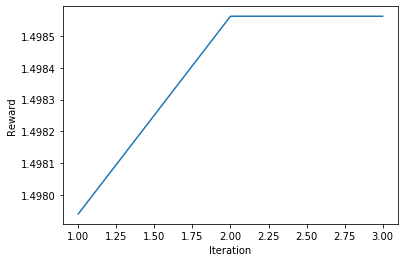

In [754]:
ax = sns.lineplot(x="Iteration", y="Reward", data=policy_df)

In [834]:
start = time.time()
print("hello")
vi = mdptoolbox.mdp.ValueIteration(blackjack.T, blackjack.R, 0.9)
vi_output = vi.run()
end = time.time()
print(end - start)

hello
0.05094599723815918


In [ ]:
ax = sns.heatmap(blah[(blah.skipped == 0)][['player', 'policy']].groupby('player').mean(), vmin=0, vmax=1)
ax.set_ylabel("Card Values")
ax.set_xlabel("(skip=0, hit=1)")
ax.set_title("Blackjack: Player Policy Avg. by Card Value")

In [780]:
value_df = pd.DataFrame(vi_output)
value_df['algorithm'] = 'value_iteration'

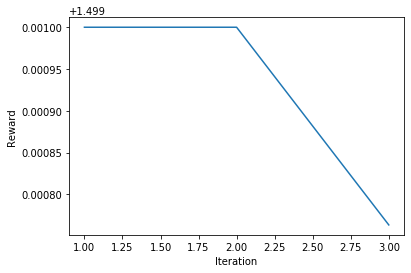

In [781]:
ax = sns.lineplot(x="Iteration", y="Reward", data=value_df)

In [782]:
test = pd.DataFrame({'value_iteration': vi.policy, 'policy_iteration': pi.policy})
test[test.value_iteration != test.policy_iteration]

,value_iteration,policy_iteration
356,0,1


In [783]:
test = test.replace(0, 'skip').replace(1, 'hit')

In [794]:
blah = pd.DataFrame(blackjack.STATELIST).transpose().rename(columns={0: "skipped", 1: "player", 2: "dealer"})
blah['policy'] = pd.Series(pi.policy)

Text(0.5, 1, 'Blackjack: Player Policy Avg. by Card Value')

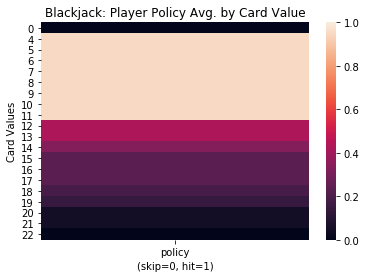

In [795]:
ax = sns.heatmap(blah[(blah.skipped == 0)][['player', 'policy']].groupby('player').mean(), vmin=0, vmax=1)
ax.set_ylabel("Card Values")
ax.set_xlabel("(skip=0, hit=1)")
ax.set_title("Blackjack: Player Policy Avg. by Card Value")

Text(0.5, 1, 'Blackjack: Player Policy Avg. by Card Value')

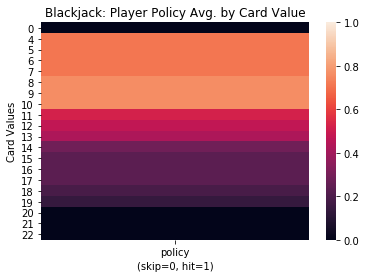

In [786]:
ax = sns.heatmap(blah[(blah.skipped == 0)][['player', 'policy']].groupby('player').mean(), vmin=0, vmax=1)
ax.set_ylabel("Card Values")
ax.set_xlabel("(skip=0, hit=1)")
ax.set_title("Blackjack: Player Policy Avg. by Card Value")

In [761]:
plot = pd.DataFrame(test.melt().groupby(['variable', 'value']).value.count())


In [762]:
plot.rename(columns={'variable': 'algorithm', 'value':'count' })

count
variable         value       
policy_iteration hit      167
                 skip     632
value_iteration  hit      166
                 skip     633

In [729]:
test.policy_iteration.value_counts()

0    591
1    208
Name: policy_iteration, dtype: int64

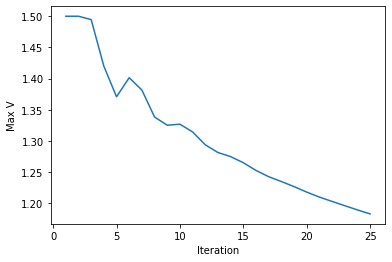

In [713]:
ax = sns.lineplot(x="Iteration", y="Max V", data=value_df)

In [714]:
comb = pd.concat([value_df, policy_df])

Text(0.5, 1.0, 'Blackjack: Reward vs. Iteration')

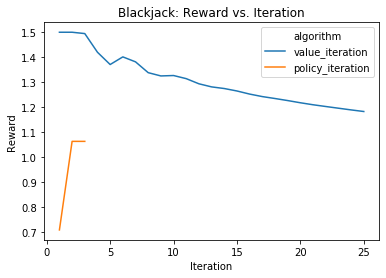

In [715]:
ax = sns.lineplot(x="Iteration", y="Reward", data=comb, hue="algorithm")
ax.set_title("Blackjack: Reward vs. Iteration")

Text(0.5, 1.0, 'Blackjack: Mean V vs. Iteration')

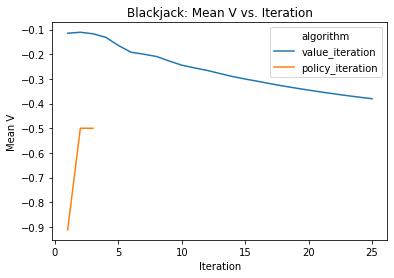

In [716]:
ax = sns.lineplot(x="Iteration", y="Mean V", data=comb, hue="algorithm")
ax.set_title("Blackjack: Mean V vs. Iteration")

Text(0.5, 1.0, 'Blackjack: Runtime vs. Iteration')

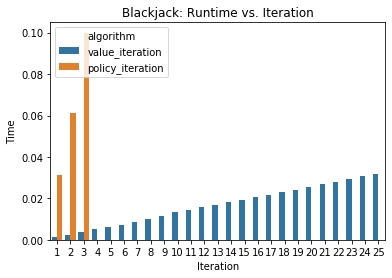

In [717]:
ax = sns.barplot(x="Iteration", y="Time", data=comb, hue="algorithm")
ax.set_title("Blackjack: Runtime vs. Iteration")

In [718]:
vi_df = pd.DataFrame()

for discount_factor in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    vi = mdptoolbox.mdp.ValueIteration(blackjack.T, blackjack.R, discount_factor)
    vi_output = vi.run()
    df = pd.DataFrame(vi_output)
    df['algorithm'] = "value_iteration"
    df['discount_factor'] = discount_factor
    vi_df = vi_df.append(df)

Text(0.5, 1.0, 'Blackjack: Value Iteration Reward by Discount Factor')

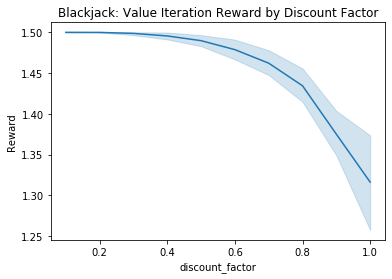

In [719]:
ax = sns.lineplot(x="discount_factor", y="Reward", data=vi_df)
ax.set_title("Blackjack: Value Iteration Reward by Discount Factor")


In [833]:
pi_df = pd.DataFrame()

for discount_factor in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    pi = mdptoolbox.mdp.PolicyIteration(blackjack.T, blackjack.R, discount_factor)
    pi_output = pi.run()
    df = pd.DataFrame(pi_output)
    df['algorithm'] = "policy_iteration"
    df['discount_factor'] = discount_factor
    pi_df = pi_df.append(df)

KeyboardInterrupt: 

Text(0.5, 1.0, 'Blackjack: Policy Iteration Reward by Discount Factor')

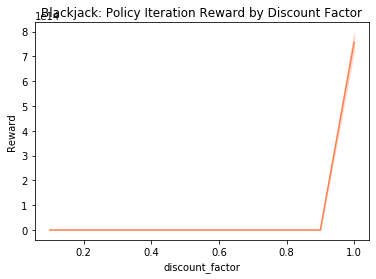

In [721]:
ax = sns.lineplot(x="discount_factor", y="Reward", data=pi_df, color='coral')
ax.set_title("Blackjack: Policy Iteration Reward by Discount Factor")


In [165]:
df_output = pd.concat([vi_df, pi_df])

In [169]:
df_output

,State,Action,Reward,Error,Time,Max V,Mean V,Iteration,algorithm,discount_factor
0,None,None,1.500000e+00,2.500000,0.001427,1.500000e+00,-1.151439e-01,1,value_iteration,0.1
1,None,None,1.500000e+00,0.250000,0.002859,1.500000e+00,-1.147114e-01,2,value_iteration,0.1
0,None,None,1.500000e+00,2.500000,0.001471,1.500000e+00,-1.151439e-01,1,value_iteration,0.2
1,None,None,1.500000e+00,0.500000,0.004373,1.500000e+00,-1.142789e-01,2,value_iteration,0.2
2,None,None,1.499763e+00,0.063905,0.006125,1.499763e+00,-1.146943e-01,3,value_iteration,0.2
...,...,...,...,...,...,...,...,...,...,...
995,None,None,6.823798e+14,0.750000,20.122769,6.823798e+14,6.823798e+14,996,policy_iteration,1.0
996,None,None,6.699284e+14,1.000000,20.142479,6.699284e+14,6.699284e+14,997,policy_iteration,1.0
997,None,None,1.047255e+15,1.375000,20.163194,1.047255e+15,1.047255e+15,998,policy_iteration,1.0
998,None,None,8.235668e+14,0.750000,20.185796,8.235668e+14,8.235668e+14,999,policy_iteration,1.0


Text(0.5, 1.0, 'Blackjack: Reward vs. Discount Factor')

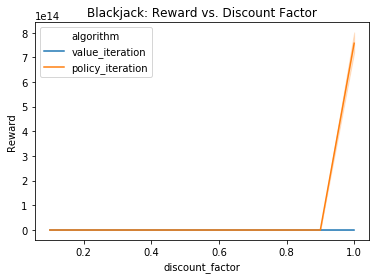

In [171]:
ax = sns.lineplot(x="discount_factor", y="Reward", hue="algorithm", data=df_output)
ax.set_title("Blackjack: Reward vs. Discount Factor")

In [ ]:
#                  alpha=0.1, alpha_decay=0.99, alpha_min=0.001,
#                  epsilon=1.0, epsilon_min=0.1, epsilon_decay=0.99,
#                  n_iter=10000, skip_check=False, iter_callback=None,
#                  run_stat_frequency=None):

In [835]:
correct_policy = vi.policy



In [839]:
correct_policy == ql.policy

False

In [780]:
value_df = pd.DataFrame(vi_output)
value_df['algorithm'] = 'value_iteration'

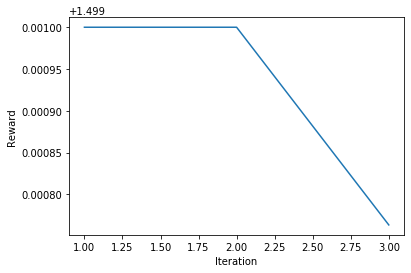

In [781]:
ax = sns.lineplot(x="Iteration", y="Reward", data=value_df)

In [993]:


matrix = {'discount': [0.8, 0.9, 1], 'alpha': [0.1, 0.2, 0.3], 'alpha_decay': [0.2, 0.7, 0.8, 0.9]}

for d in matrix['discount']:
    for a in matrix['alpha']:
        for ad in matrix['alpha_decay']:
            ql = mdptoolbox.mdp.QLearning(blackjack.T, blackjack.R, d, alpha=a, alpha_decay=ad)
            ql.setVerbose()
            ql_output = ql.run()
            print("discount: {}, alpha: {}, alpha_decay: {}".format(d, a, ad))
            print(pd.Series(ql.policy).value_counts())
            break   
        

discount: 0.8, alpha: 0.1, alpha_decay: 0.2
0    615
1    184
dtype: int64
discount: 0.8, alpha: 0.2, alpha_decay: 0.2
0    616
1    183
dtype: int64
discount: 0.8, alpha: 0.3, alpha_decay: 0.2
0    607
1    192
dtype: int64
discount: 0.9, alpha: 0.1, alpha_decay: 0.2
0    623
1    176
dtype: int64
discount: 0.9, alpha: 0.2, alpha_decay: 0.2
0    617
1    182
dtype: int64
discount: 0.9, alpha: 0.3, alpha_decay: 0.2
0    621
1    178
dtype: int64
discount: 1, alpha: 0.1, alpha_decay: 0.2
0    596
1    203
dtype: int64
discount: 1, alpha: 0.2, alpha_decay: 0.2
0    623
1    176
dtype: int64
discount: 1, alpha: 0.3, alpha_decay: 0.2
0    596
1    203
dtype: int64


In [991]:
print(pd.Series(ql.policy).value_counts())

0    638
1    161
dtype: int64


In [996]:
ql = mdptoolbox.mdp.QLearning(blackjack.T, blackjack.R, 1, alpha=0.1, alpha_decay=0.2)
ql.setVerbose()
ql_output = ql.run()

Text(0.5, 1, 'Blackjack: Q-matrix Heatmap')

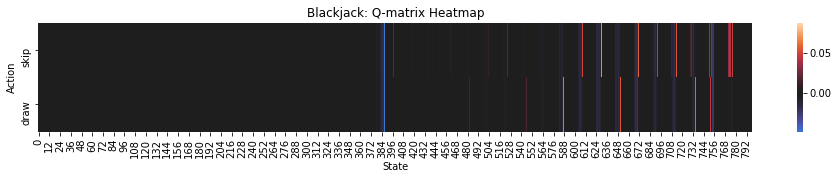

In [998]:
#     0: 'skip',
#     1: 'draw'
plt.figure(figsize=(16, 2))
ax = sns.heatmap(ql.Q.transpose(), center=0, yticklabels=["skip","draw"])
ax.set_xlabel("State")
ax.set_ylabel("Action")
ax.set_title("Blackjack: Q-matrix Heatmap")

In [584]:
ql.Q.transpose()

array([[-0.00010732,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00011938,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [265]:
blackjack.STATELIST

799

In [446]:
.max()

ql.Q.index(min(ql.Q))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [447]:
np.argmax(ql.Q, axis=0)

array([609, 588])

In [609]:
test = set(zip(vi.policy,blackjack.STATELIST))

In [604]:
test = np.where(ql.Q > 0.02)

test = set(zip(test[0],test[1]))

In [621]:
test = pd.DataFrame(blackjack.STATELIST).transpose().rename(columns={0: "skipped", 1: "player", 2: "dealer"})
test['policy'] = pd.Series(vi.policy)

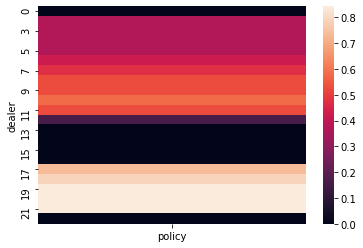

In [644]:
sns.heatmap(test[(test.skipped == 0)][['dealer', 'policy']].groupby('dealer').mean())

Text(0.5, 1, 'Blackjack: Player Policy Avg. by Card Value')

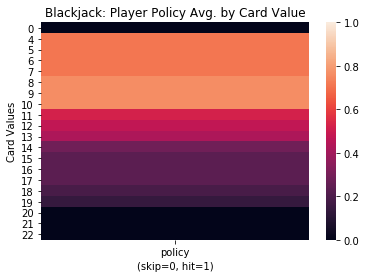

In [655]:
ax = sns.heatmap(test[(test.skipped == 0)][['player', 'policy']].groupby('player').mean(), vmax=1, vmin=0)
ax.set_ylabel("Card Values")
ax.set_xlabel("(skip=0, hit=1)")
ax.set_title("Blackjack: Player Policy Avg. by Card Value")

In [610]:
lu = {0: 'skip',
 1: 'draw'}

output = pd.DataFrame(columns=["action", "player_score", "dealer_score"])

for k in test:
    state = blackjack.STATELIST[k[0]]
    df = pd.DataFrame({"action": [lu[k[1]]], "player_score": [state[1]], "dealer_score": [state[2]]})
    output = output.append(df)
#     print("{}: {}".format(lu[k[1]], blackjack.STATELIST[k[0]]))

KeyError: 378

In [607]:
output[(output.dealer_score != 22)].sort_values('action')

,action,player_score,dealer_score
0,draw,21,18
0,draw,20,17
0,skip,19,17
0,skip,19,18
0,skip,20,18
0,skip,20,19
0,skip,21,19
0,skip,21,20
0,skip,18,17


In [603]:
output

,action,player_score,dealer_score
0,draw,16,22
0,skip,19,17
0,skip,20,22
0,skip,10,22
0,skip,11,22
0,draw,21,18
0,skip,19,18
0,skip,21,22
0,skip,20,18
0,skip,13,22


In [579]:
sns.heatmap(output)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# QL/PI/VI : Reward / Max V/ Mean V vs # of iterations
# GW: I am plotting arrows to indicate directions
# GW: I am plotting heatmap for values